In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
import itertools

In [4]:
from google.colab import files
upload = files.upload()

Saving ORL_faces.npz to ORL_faces.npz


In [5]:
# Load Dataset
data = np.load('ORL_faces.npz')

# Load the "Train Images"
x_train = data['trainX']

# Normalize Every Image
x_train = np.array(x_train, dtype = 'float32')/255

x_test = data['testX']
x_test = np.array(x_test, dtype = 'float32')/255

# Load the Label of Images
y_train = data['trainY']
y_test = data['testY']

# Show the Train and Test Data Format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape : {}'.format(y_train))
print('x_test shape : {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape : [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = .05, random_state = 1234)

In [7]:
im_rows = 112
im_cols = 92
batch_size = 512
im_shape = (im_rows, im_cols, 1)

# Changes the Size of Images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape : {}'.format(y_train.shape[0]))
print('x_test shape : {}'.format(y_test.shape))

x_train shape : 228
x_test shape : (160,)


In [8]:
cnn_model = Sequential([
    Conv2D(filters = 36, kernel_size = 7, activation = 'relu', input_shape = im_shape),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters = 54, kernel_size = 5, activation = 'relu', input_shape = im_shape),
    MaxPooling2D(pool_size = 2),
    Flatten(),
    Dense(2024, activation = 'relu'),
    Dropout(0.5),
    Dense(1024, activation = 'relu'),
    Dropout(0.5),
    Dense(512, activation = 'relu'),
    Dropout(0.5),

    # 20 is the Number of Outputs
    Dense(20, activation = 'softmax')
])

cnn_model.compile(
    loss = 'sparse_categorical_crossentropy', # 'Categorical_Crossentropy,
    optimizer = Adam(lr = 0.0001),
    metrics = ['accuracy']
)

In [9]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 53, 43, 36)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 19, 54)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

In [10]:
history = cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size = 512,
    epochs = 250, verbose = 2,
    validation_data = (np.array(x_valid), np.array(y_valid)),
)

Epoch 1/250
1/1 - 13s - loss: 3.0504 - accuracy: 0.0263 - val_loss: 3.0978 - val_accuracy: 0.0000e+00 - 13s/epoch - 13s/step
Epoch 2/250
1/1 - 10s - loss: 3.1890 - accuracy: 0.0570 - val_loss: 3.0854 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 3/250
1/1 - 8s - loss: 3.0249 - accuracy: 0.0702 - val_loss: 3.0052 - val_accuracy: 0.0833 - 8s/epoch - 8s/step
Epoch 4/250
1/1 - 9s - loss: 2.9860 - accuracy: 0.0702 - val_loss: 3.0080 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 5/250
1/1 - 9s - loss: 2.9860 - accuracy: 0.0702 - val_loss: 3.0151 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 6/250
1/1 - 9s - loss: 2.9796 - accuracy: 0.0833 - val_loss: 3.0153 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 7/250
1/1 - 10s - loss: 2.9749 - accuracy: 0.0658 - val_loss: 3.0016 - val_accuracy: 0.0833 - 10s/epoch - 10s/step
Epoch 8/250
1/1 - 8s - loss: 2.9621 - accuracy: 0.1228 - val_loss: 3.0100 - val_accuracy: 0.0833 - 8s/epoch - 8s/step
Epoch 9/250
1/1 - 10s - los

In [11]:
scor = cnn_model.evaluate(np.array(x_test), np.array(y_test), verbose = 0)
print('test los {:.4f}'.format(scor[0]))
print('test acc (:.4f)'.format(scor[1]))

test los 0.8557
test acc (:.4f)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


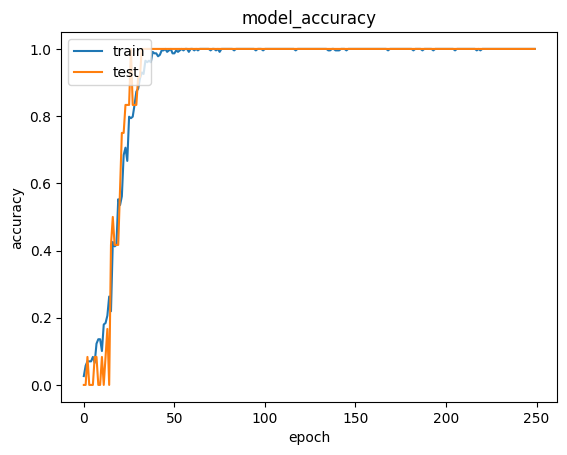

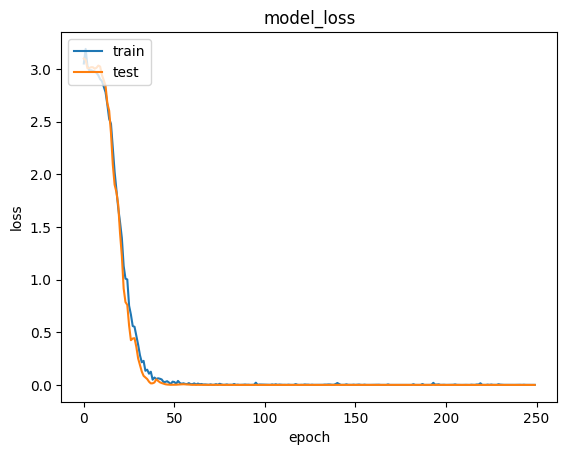

In [12]:
# List All Data in History
print(history.history.keys())

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [27]:
predict = np.array(cnn_model.predict(x_test))
# print(predicted)
# print(y_test)
ynew = cnn_model.predict(x_test)

Acc = accuracy_score(y_test, np.argmax(ynew, axis =1))
print("accuracy : ")
print(Acc)
# /tn, fp, fn, tp = confusion_matrix(np.array(y_test), y_new).ravel()
cnf_matrix = confusion_matrix(np.array(y_test), np.argmax(ynew, axis =1))

5/5 [==============================] - 3s 496ms/step
accuracy : 
0.89375


Confusion Matrix, without normalization
[[6 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 6]]
Confusion Matrix, Without Normalization


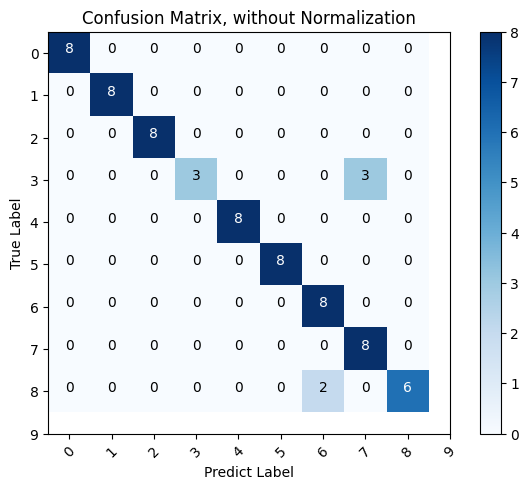

Confusion Matrix, Without Normalization


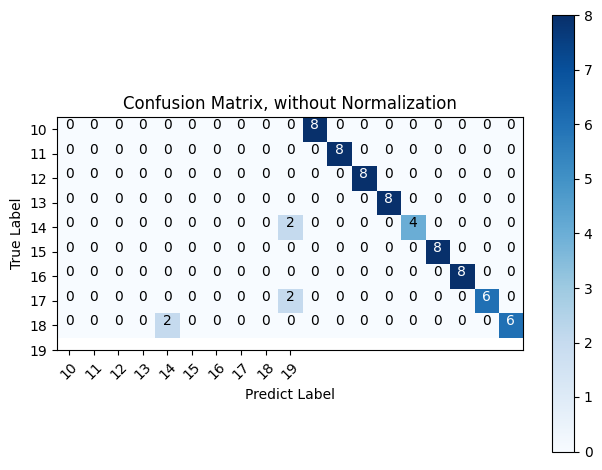

Confusion Matrix :
[[6 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 6]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This Function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize = True'.
  """
  if normalize :
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    # print("Normalized Confusion Matrix")

  else:
    print('Confusion Matrix, Without Normalization')

  # print(cm)
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = "center",
             color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predict Label')
  plt.show()

print('Confusion Matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10, 1:10], classes = [0,1,2,3,4,5,6,7,8,9],
                      title = 'Confusion Matrix, without Normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20, 1:20], classes = [10,11,12,13,14,15,16,17,18,19],
                      title = 'Confusion Matrix, without Normalization')

print("Confusion Matrix :\n%s" % confusion_matrix(np.array(y_test), np.argmax(ynew, axis =1)))
print(classification_report(np.array(y_test), np.argmax(ynew, axis =1)))